In [1]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [11]:
df = import_submission("sub_124845")


In [18]:
mask = np.logical_and(df.Longitude.between(25,40),df.Latitude.between(-57,1000))
dfm = df[mask]
del dfm["TripId"]
N = len(dfm)


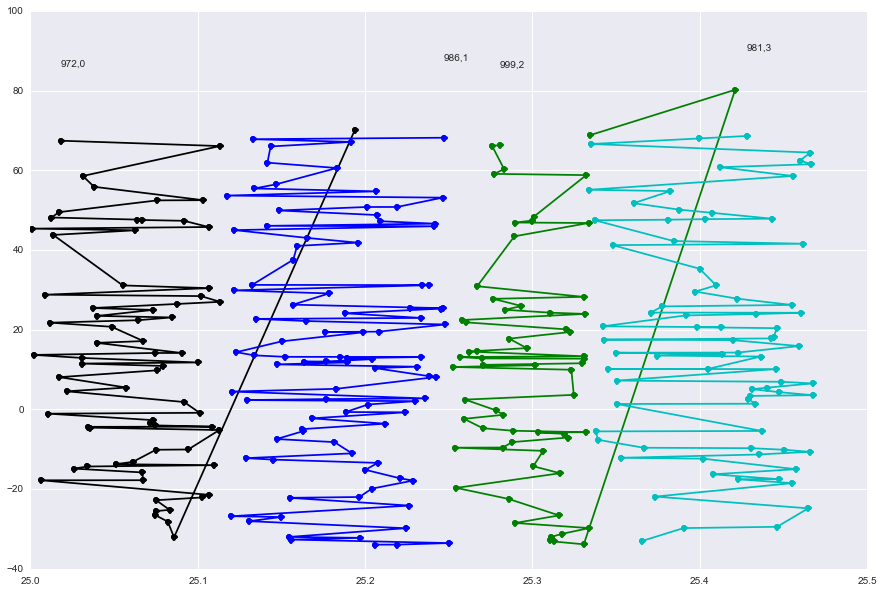

In [19]:
dfm["TripId"] = optimize(dfm.Weight.values,1000)
dfm = dfm[dfm.TripId.isin([0,1,2,3])]
plot_trips(dfm,range(10))

In [20]:
# dfm = df[mask][0:160]
# del dfm["TripId"]
dfm = dfm.sort_values("Longitude")

N = len(dfm)
out = []
d_ran = [0]
seg_ran = [5]
for d in d_ran:
    for bc in seg_ran:
        b = np.linspace(0,N,bc+1).astype(int)
        dfm["TripId"] = np.nan
        for k,(s,f) in enumerate(window(b)):
            dfm["TripId"][s:f] = k
        dfm = sort_trips(dfm)
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
#         dfm,score = combo_optimizer(dfm,range(k+1))
#         dfm,score = combo_optimizer(dfm,[0,1,2])
        if dfm.groupby("Weight").agg({"Weight":np.sum}).max().values[0]>1000:
            continue
        out.append([len(np.unique(dfm.TripId)),d,b,k,score])
        plot_trips(dfm,range(10))
        plt.show()
out

0.293316564214
0.293316564214 ====================================
0 1 0.124989341367 ++++++++++++++ 0.0
0.124989341367 0.0266909980293 0.0982983433374
0.0266909980293 0.0170654538944 0.00962554413492
0.0170654538944 0.0151150582815 0.00195039561284
0.0151150582815 0.0149288049007 0.00018625338085
0.0149288049007 0.0147358235016 0.000192981399027
0.0147358235016 0.0147333242182 2.49928343253e-06
wrote change to df 0.183060550591
1 2 0.0536228041305 ++++++++++++++ 0.19
0.0536228041305 0.0142716978088 0.0393511063217
0.0142716978088 0.0118985060438 0.00237319176498
0.0118985060438 0.0105542649319 0.00134424111189
0.0105542649319 0.0102375282968 0.00031673663517
0.0102375282968 0.0101785207974 5.90074993779e-05
0.0101785207974 0.0101645289341 1.39918632799e-05
0.0101645289341 0.0101644459801 8.29540422551e-08
wrote change to df 0.139602194404
2 3 0.0724257778299 ++++++++++++++ 0.32
0.0724257778299 0.0253433714374 0.0470824063925
0.0253433714374 0.020480203213 0.00486316822438
0.0204802032

KeyboardInterrupt: 

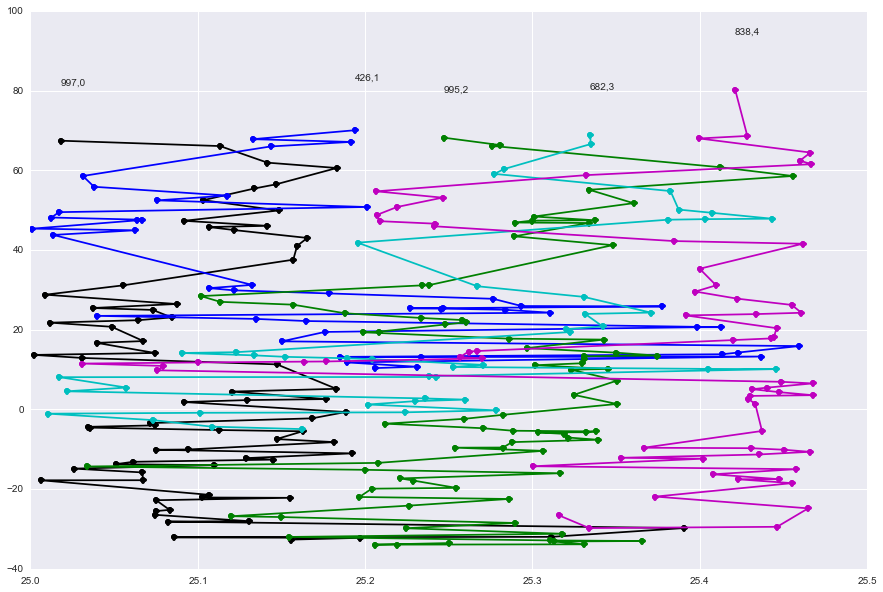

In [21]:

plot_trips(dfm,range(10))

In [ ]:
dfm = combo_optimizer(dfm,[0,1])